# Exploring Simple Linear Model Assumptions

### Create a data set 

The base values are linear with random normally distributed error.
You can manipulate x, y, and error term statistics to see how our assumption checking plots change

Loading required package: timeDate

Loading required package: timeSeries

Loading required package: fBasics



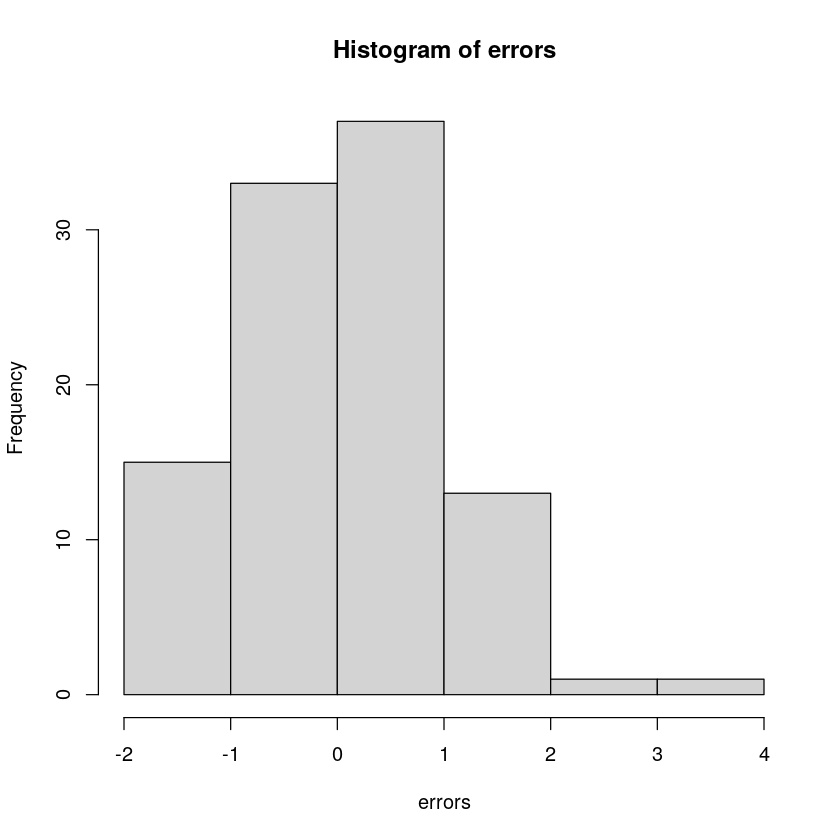

In [1]:
#install.packages('fGarch')
#install.packages('truncnorm')
library(fGarch)
library(truncnorm)
library(MASS)

n <- 100 # number of x-values
min <- 10 # min of x-values
max <- 30 # max of x-values
slope <- 3 # slope of linear model
intercept <- 2 # intercept of linear model

# Create empty dataframe
df <- data.frame(xcol=integer(), ycol=integer(), stringsAsFactors = FALSE)

# Create normally distributed x-values as predictors
x_vals <- rnorm(n, mean=10, sd=1)

# For each x...
for (x in x_vals) {
    # create error terms
    #--------------------
        errors <- rnorm(n=n,mean=0,sd=1) # normal distribution 
    #     errors <- rsnorm(n=n,mean=0,sd=1, xi=3) # right skewed normal distribution
    #     errors <- rsnorm(n=n,mean=0,sd=1, xi=-3) # left skewed normal distribution
    #     errors <- rt(n=n, df=2) # heavy-tailed t distribution
    #     errors <- runif(n=n, min=-4, max=4) # light-tailed uniform distribution
    #     errors <- c(rnorm(n/2, mean=2, sd=.25), 
    #         rnorm(n/2, mean=4, sd=.25)) # bimodal distribution
    
    # for each error term...
    for (e in errors) {
        # create transformed predictors
        #------------------------------
        x_trans <- x # no transformation of predictors
#         x_trans <- x^2 # squared predictors
#         x_trans <- sqrt(x) # square root predictors
#         x_trans <- log(x) # log of predictors

        # Calculate reponse
        y <- slope * x_trans + intercept + e
        
        # create transformed responses
        #------------------------------
        y_trans <- y # no transformation of responses
#         y_trans <- y^2 # squared responses
#         y_trans <- sqrt(y) # squar root responses
#         y_trans <- log(y) # log of responses
        
        # add predictor and response to dataframe
        df[nrow(df)+1,] = c(x_trans,y_trans)
    }
}

attach(df)

hist(errors)

### Plot linear model


Call:
lm(formula = ycol ~ xcol)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6250 -0.6615 -0.0065  0.6770  3.8814 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.929835   0.095381   20.23   <2e-16 ***
xcol        3.006356   0.009453  318.04   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.002 on 9998 degrees of freedom
Multiple R-squared:   0.91,	Adjusted R-squared:   0.91 
F-statistic: 1.011e+05 on 1 and 9998 DF,  p-value: < 2.2e-16


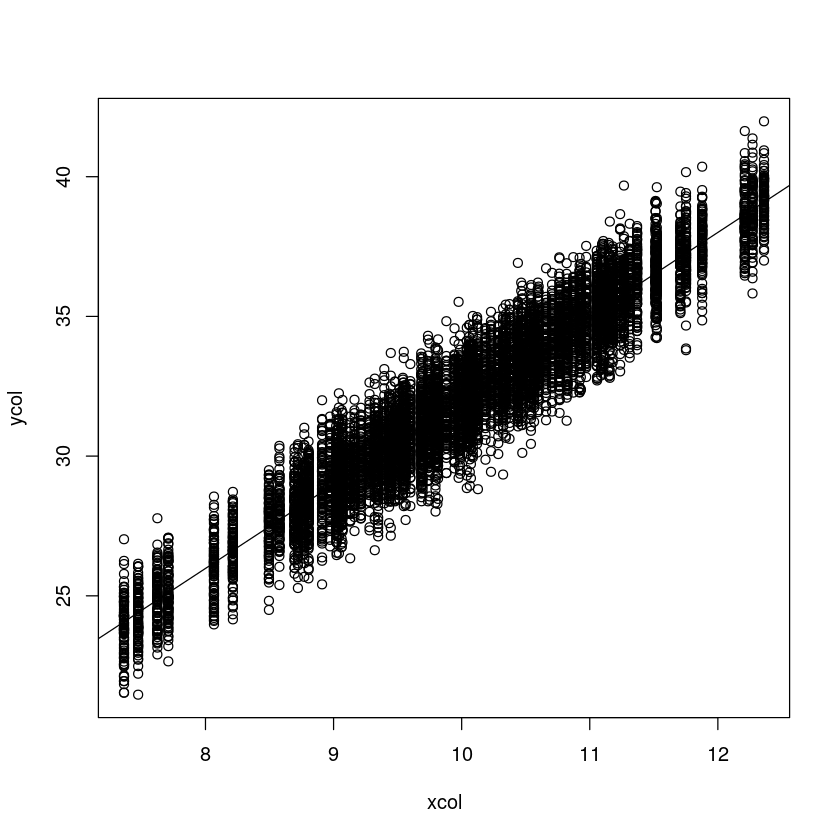

In [2]:
result <- lm(ycol~xcol)
summary(result)

plot(ycol~xcol)
abline(result)

### Residuals plot: Checks mean and variance of error terms

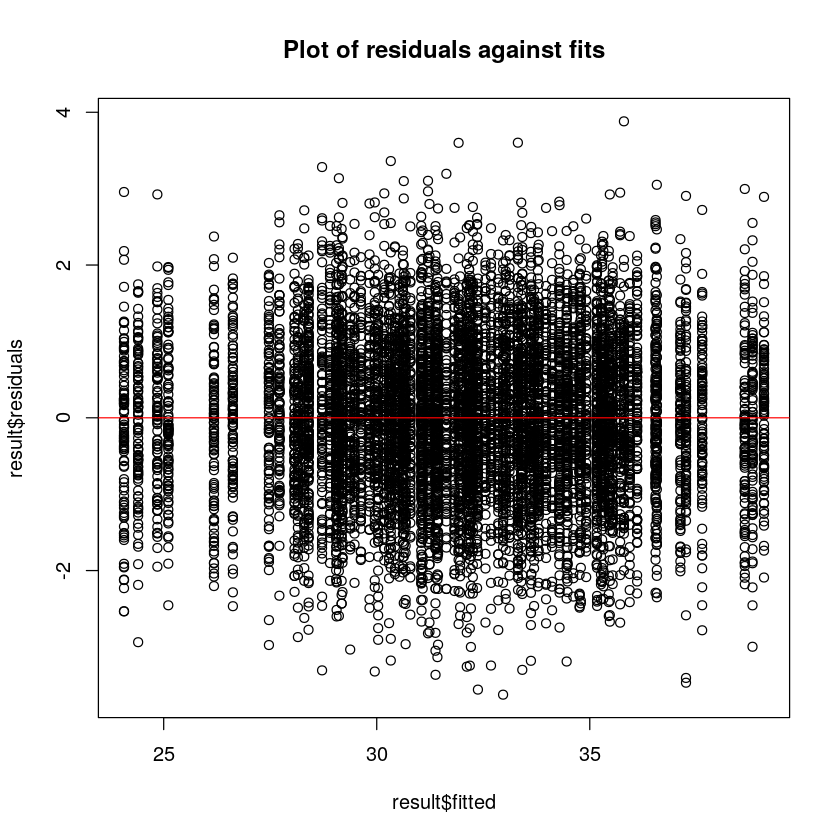

In [3]:
plot(result$fitted, result$residuals, main="Plot of residuals against fits")
abline(h=0, col="red")

In [4]:
### ACF of Residuals: Checks error terms are not correlated

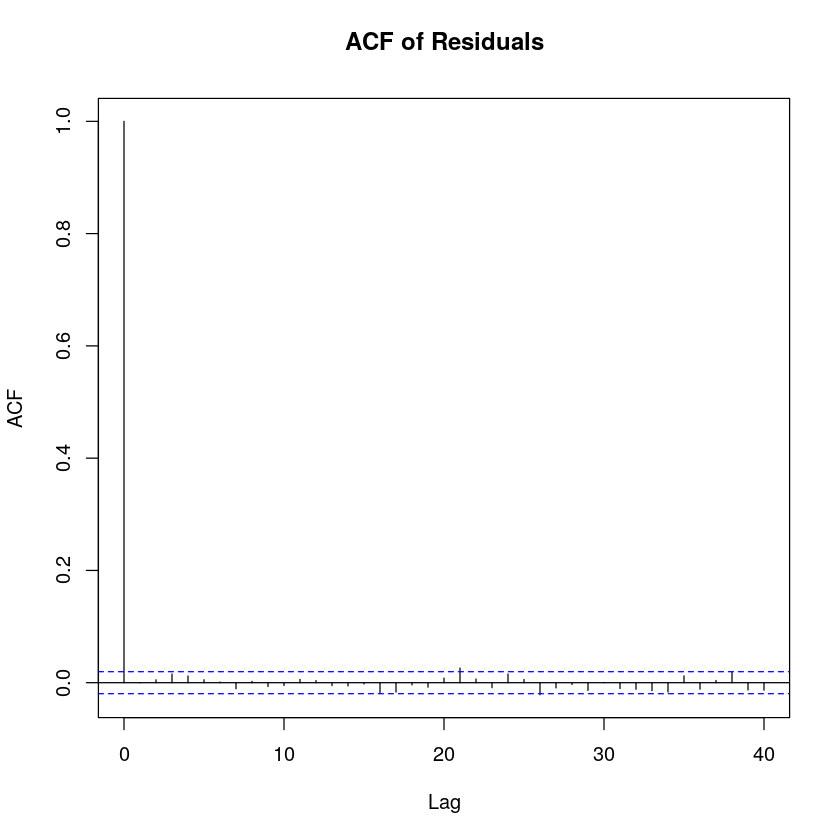

In [5]:
acf(result$residuals, main="ACF of Residuals")

### Normal Probability Plot of Residuals: Checks normality of error terms

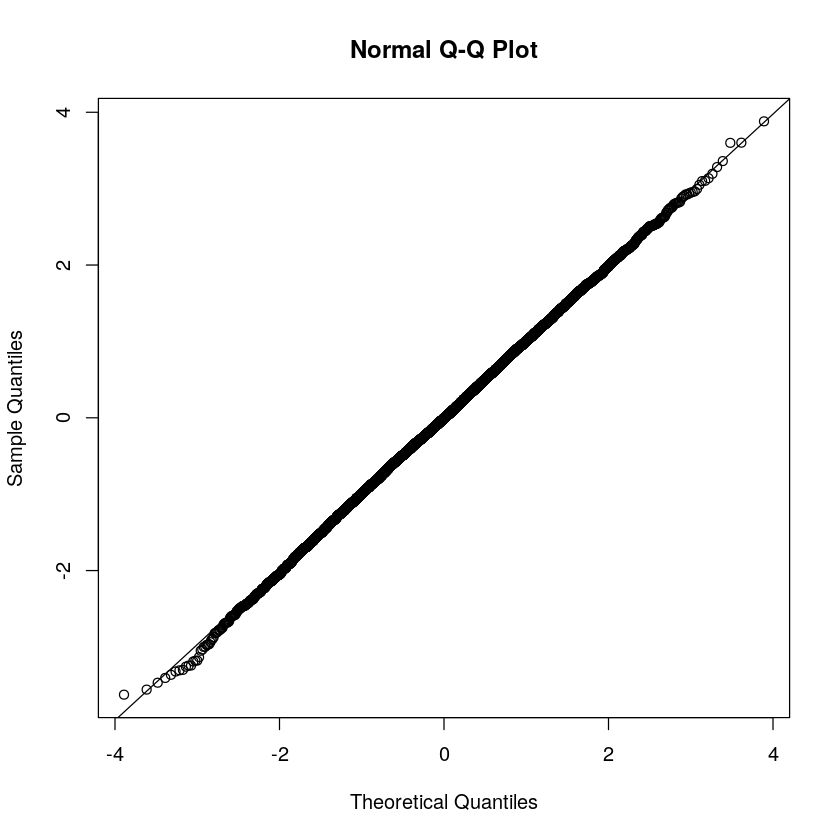

In [6]:
qqnorm(result$residuals)
qqline(result$residuals)

### Box-Cox Plot: Test for y power transformation lambda

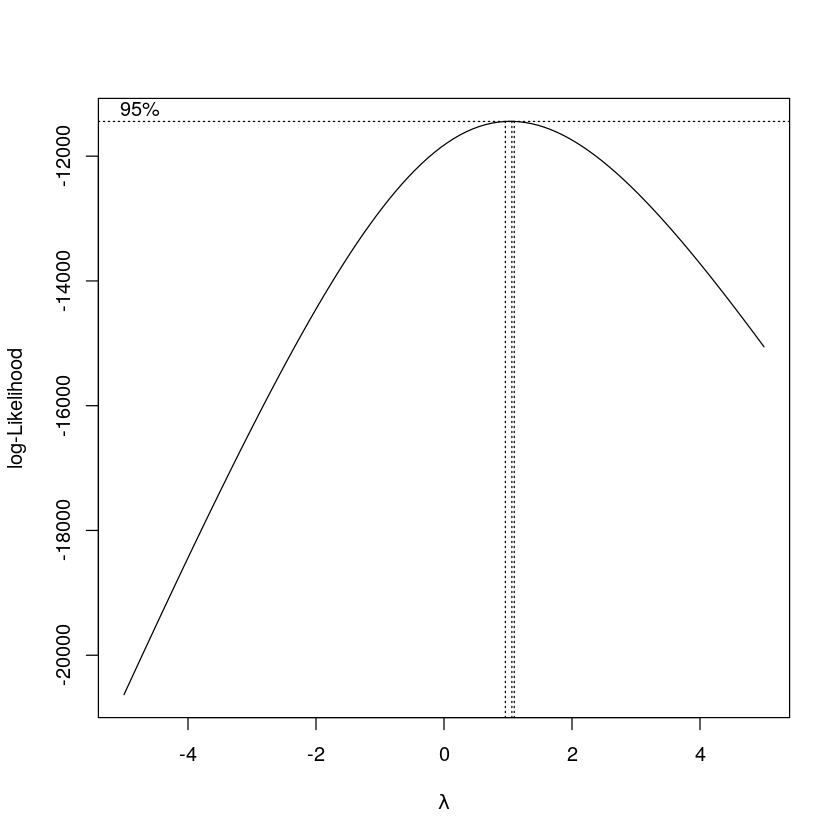

In [7]:
bx <- boxcox(result, lambda=seq(-5, 5, by=0.5))